In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [4]:
df=pd.read_excel("Data%20scoring%20zypl%20aug%202024.xlsx", sheet_name="Sheet1")

print(len(df))
len(df.columns)

1067


53

In [5]:
df.describe()

,Nr.,Nr. Credit,Currency,Amount,"Amount, MDL","Maturity, months",IR,EIR,Amount pledge,Ages of borrower,"maxim days in arrears, at MK","Working capital total, MDL","Fixed assets total, MDL","Debts to suppliers, MDL","Annual sales volume, MDL","Assets according to BS (for LLC, Ind. Comp, family farms)","Equity according to BS (for LLC, Ind. Comp, family farms)","Net profit acc to BS (for LLC, Ind. Comp, family farms)",How many loans acc to CB at the time of approval,Assets according to Public Service Agency
count,1067.000000,1.067000e+03,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1066.000000,1067.000000,1067.000000,49.000000,48.000000,47.000000,7.790000e+02,1.620000e+02,1.620000e+02,170.000000,784.000000,4.910000e+02
mean,534.000000,2.072247e+09,498.0,57496.438613,57444.892221,21.619494,23.101687,12520.761324,2460.623827,42.857545,6.168697,73886.326531,157818.375000,1744.680851,5.254457e+05,1.611415e+05,5.275325e+04,17377.388235,1.818878,5.632031e+04
std,308.160672,1.867174e+08,0.0,33651.446845,33626.582551,8.732824,2.737279,68011.112686,15091.715861,11.253865,40.789990,144526.787308,240806.627383,7373.477986,7.056130e+05,1.237053e+06,2.945211e+05,91601.787545,2.341878,3.392657e+05
min,1.000000,1.702004e+09,498.0,5000.000000,5000.000000,3.000000,10.000000,12.835200,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-5.541000e+04,-68342.000000,0.000000,0.000000e+00
25%,267.500000,1.904003e+09,498.0,30000.000000,30000.000000,12.000000,20.000000,34.185000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,1.755020e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,534.000000,2.102004e+09,498.0,51000.000000,50000.000000,24.000000,25.000000,37.008000,0.000000,42.000000,0.000000,0.000000,15000.000000,0.000000,3.349680e+05,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
75%,800.500000,2.212001e+09,498.0,80000.000000,80000.000000,24.000000,25.000000,40.252800,0.000000,52.000000,0.000000,50000.000000,289350.000000,0.000000,6.000000e+05,0.000000e+00,0.000000e+00,0.000000,3.000000,0.000000e+00
max,1067.000000,2.417001e+09,498.0,150000.000000,150000.000000,36.000000,30.000000,642468.000000,150000.000000,77.000000,366.000000,502000.000000,980000.000000,40000.000000,7.934532e+06,1.492236e+07,3.109377e+06,732673.000000,33.000000,4.794780e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 53 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Nr.                                                                                       1067 non-null   int64  
 1   Nr. Credit                                                                                1067 non-null   int64  
 2   Branch                                                                                    1067 non-null   object 
 3   Currency                                                                                  1067 non-null   int64  
 4   Product                                                                                   1067 non-null   object 
 5   Product details                                        

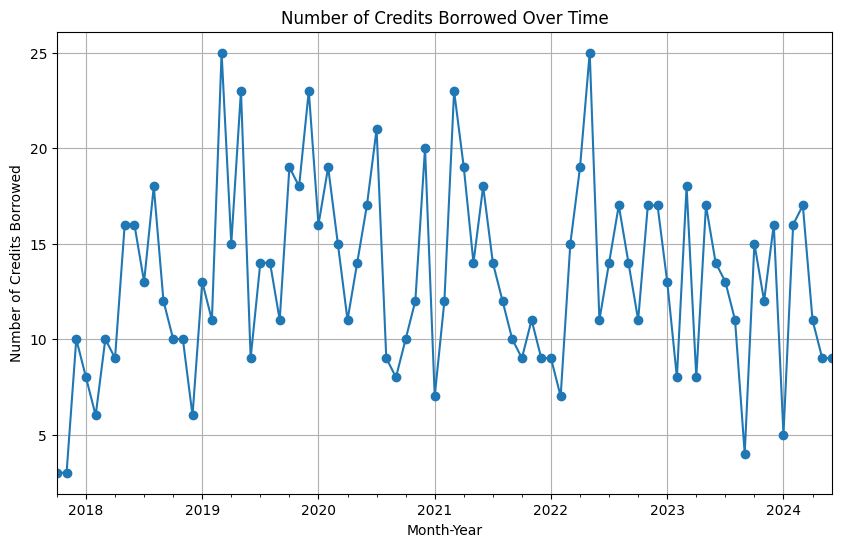

In [7]:
df["Date disbursement"]=pd.to_datetime(df["Date disbursement"])

monthly_borrowing = df.groupby(df['Date disbursement'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
monthly_borrowing.plot(kind='line', marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Number of Credits Borrowed')
plt.title('Number of Credits Borrowed Over Time')
plt.grid(True)
plt.show()


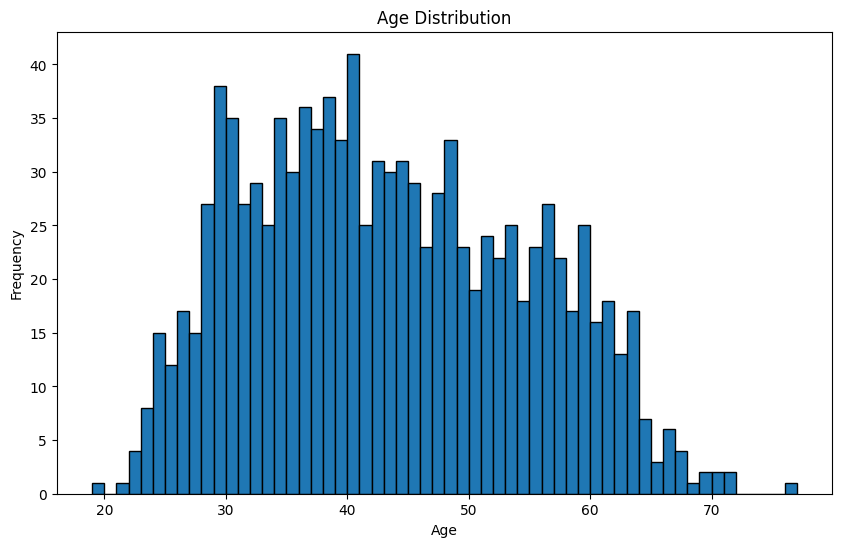

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['Ages of borrower'], bins=range(df['Ages of borrower'].min(), df['Ages of borrower'].max() + 1, 1), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

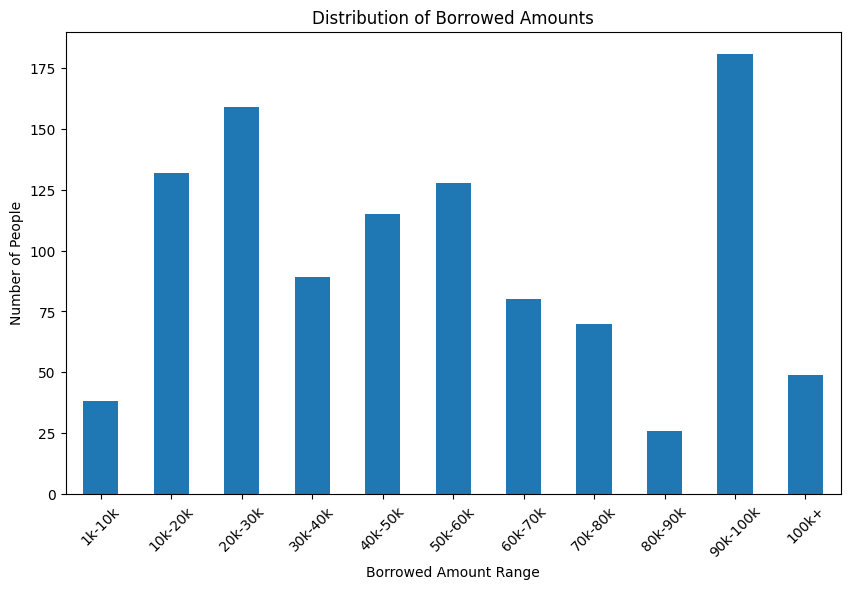

In [9]:
bins =[1000, 10000,20000,30000,40000,50000,60000,70000,80000,90000, 100000, float('inf')]
labels = ['1k-10k', '10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k', '100k+']
category_counts = pd.cut(df['Amount'], bins=bins, labels=labels).value_counts().reindex(labels, fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Borrowed Amount Range')
plt.ylabel('Number of People')
plt.title('Distribution of Borrowed Amounts')
plt.xticks(rotation=45)
plt.show()

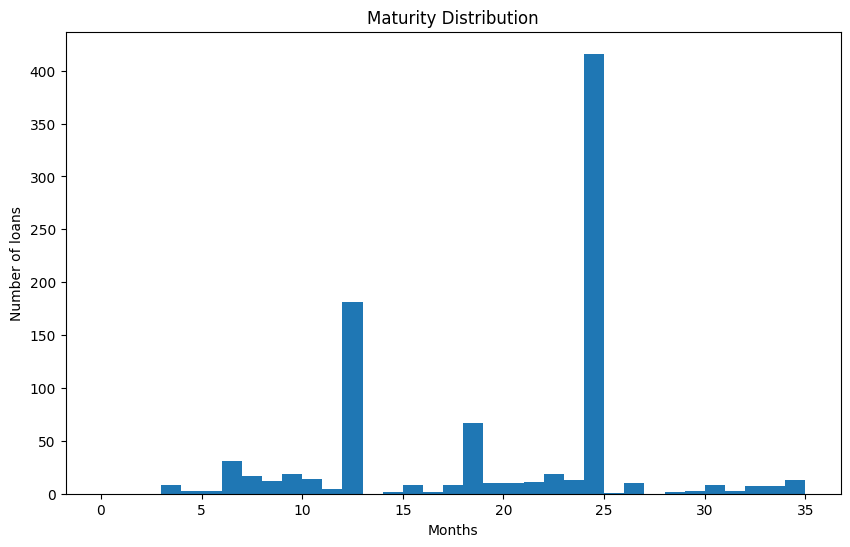

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df["Maturity, months"], bins=range(0,36))
plt.ylabel("Number of loans")
plt.xlabel("Months")
plt.title("Maturity Distribution")
plt.show()

In [11]:
df.shape

(1067, 53)

In [12]:
numerical_columns=df.select_dtypes(include=["int","float","double"]).columns

numerical_columns

Index(['Nr.', 'Nr. Credit', 'Currency', 'Amount', 'Amount, MDL',
       'Maturity, months', 'IR', 'EIR', 'Amount pledge', 'Ages of borrower',
       'maxim days in arrears, at MK', 'Working capital total, MDL',
       'Fixed assets total, MDL', 'Debts to suppliers, MDL',
       'Annual sales volume, MDL',
       'Assets according to BS (for LLC, Ind. Comp, family farms)',
       'Equity according to BS (for LLC, Ind. Comp, family farms)',
       'Net profit acc to BS (for LLC, Ind. Comp, family farms)',
       'How many loans acc to CB at the time of approval',
       'Assets according to Public Service Agency'],
      dtype='object')

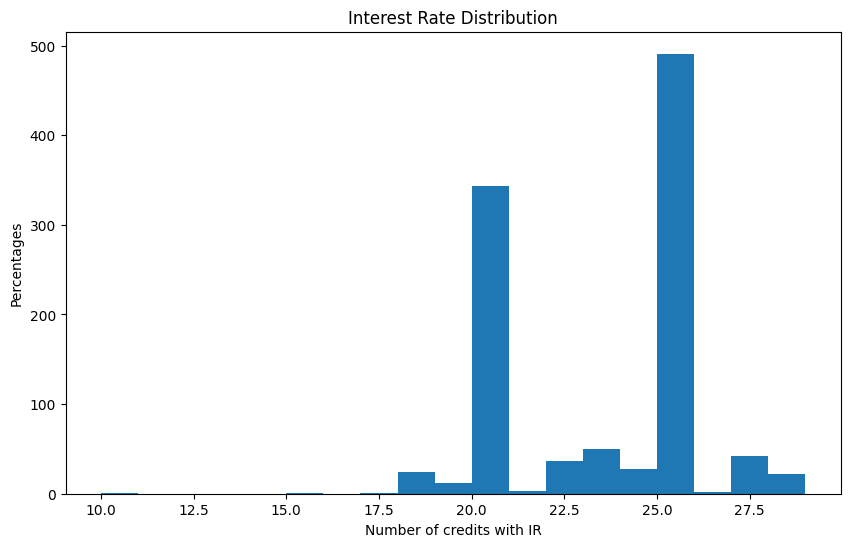

In [13]:

plt.figure(figsize=(10,6))
plt.hist(df["IR"], bins=range(10,30))
plt.xlabel("Number of credits with IR")
plt.ylabel("Percentages")
plt.title("Interest Rate Distribution")
plt.show()

In [14]:
df["Date maturity plan"]=pd.to_datetime(df["Date maturity plan"])
df["Date repaid, de facto"]=pd.to_datetime(df["Date repaid, de facto"])

dis_mat=df["Date disbursement"]<df["Date maturity plan"]


print(dis_mat.value_counts())

True    1067
Name: count, dtype: int64


In [15]:
check=df.loc[(df["Status"]=="Repaid") & (df["Date repaid, de facto"].isna())]

check

,Nr.,Nr. Credit,Branch,Currency,Product,Product details,Amount,"Amount, MDL","Maturity, months",IR,...,"Amount of loans paid monthly MDL,","Debt Service Ratio, %","Assets according to BS (for LLC, Ind. Comp, family farms)","Equity according to BS (for LLC, Ind. Comp, family farms)","Net profit acc to BS (for LLC, Ind. Comp, family farms)","days in arrears acc to Credit Bureau,max",How many loans acc to CB at the time of approval,"Duration of credit history, since the first loan reported to the moment of loan approval","Existence of debt collection files/criminal files for the last 5 years, number of files",Assets according to Public Service Agency
321,322,1806001121,Comrat,498,RAPID LOANS,RAPID LOAN 75 001-150000 MDL,90000,90000,24,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,348,1903001062,Balti,498,RAPID LOANS,RAPID LOAN <=75 000 MDL,30000,30000,24,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,585,1803003186,Balti,498,RAPID LOANS,RAPID LOAN 75 001-150000 MDL,100000,100000,24,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,652,1904003954,Soroca,498,RAPID LOANS,RAPID LOAN 75 001-150000 MDL,70000,70000,24,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,940,2003001175,Balti,498,RAPID LOANS,RAPID LOAN 75 001-150000 MDL,70000,70000,24,20.0,...,5613,0.6237,NaN,NaN,NaN,30,2.0,140,0,0.0


In [16]:
df["Status"].value_counts()

Status
Repaid         838
Current        198
Overdue         19
Charged Off     12
Name: count, dtype: int64

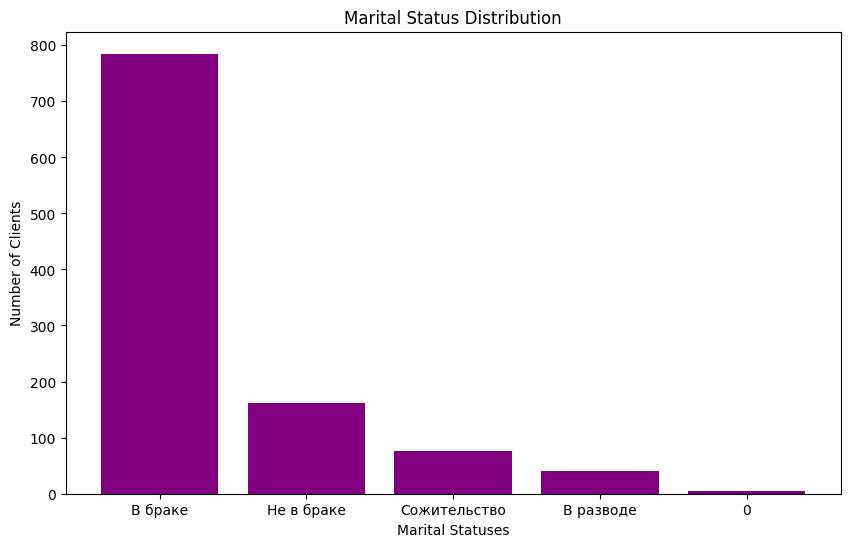

In [17]:
status_counts=df["Social status"].value_counts()
status_counts.index=status_counts.index.astype(str)

plt.figure(figsize=(10,6))
plt.bar(status_counts.index, status_counts.values, color='purple')
plt.xlabel("Marital Statuses")
plt.ylabel("Number of Clients")
plt.title("Marital Status Distribution")
plt.show()

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

In [20]:
profile.to_file("original_eda.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 20.92it/s]


In [21]:
data=pd.read_csv("data.csv")

processed=ProfileReport(data, title="Pandas Profiling Report")
processed.to_file("processed_eda.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 31.55it/s]


In [22]:
comparison=profile.compare(processed)
comparison.to_file("compared.html")

/Users/xasanboy/MY/Zypl/MikroKapital/EDA/vnev/lib/python3.8/site-packages/ydata_profiling/compare_reports.py:195: UserWarning: The datasets being profiled have a different set of columns. Only the left side profile will be calculated.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]
